<a href="https://colab.research.google.com/github/evildead23151/Deep-Learning/blob/main/apple_stock_forecasting_using_STACKED_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📈 Stock Price Prediction using LSTM Neural Network
In this project, we build a deep learning model using Long Short-Term Memory (LSTM) — a powerful variant of Recurrent Neural Networks (RNNs) — to predict future stock prices based on historical data.

Stock prices are influenced by a variety of factors and tend to follow non-linear patterns over time. Traditional models often fail to capture the temporal dependencies effectively. LSTM networks, however, are designed to learn patterns in sequential data, making them a strong candidate for time series forecasting tasks such as stock price prediction.

##🔍 What this project does:
Fetches and prepares historical stock closing price data

Scales and reshapes the data for LSTM input

Trains a sequential LSTM model to learn trends in the data

Predicts future stock prices (next 30 days) based on previous patterns

Visualizes both the actual and predicted prices for easy comparison

###✅ Why LSTM?
LSTM networks are capable of learning long-term dependencies and avoid the vanishing gradient problem, which makes them ideal for tasks like financial forecasting where context from past data is crucial.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('AAPL.csv')

In [3]:
df.set_index("Date", inplace=True)


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-16,51.070000,51.790001,50.959999,51.625000,49.954624,110481600
2019-08-19,52.654999,53.182499,52.507500,52.587502,50.885971,97654400
2019-08-20,52.720001,53.337502,52.580002,52.590000,50.888390,107537200
2019-08-21,53.247501,53.412498,52.900002,53.160000,51.439960,86141600
2019-08-22,53.297501,53.610001,52.687500,53.115002,51.396420,89014800


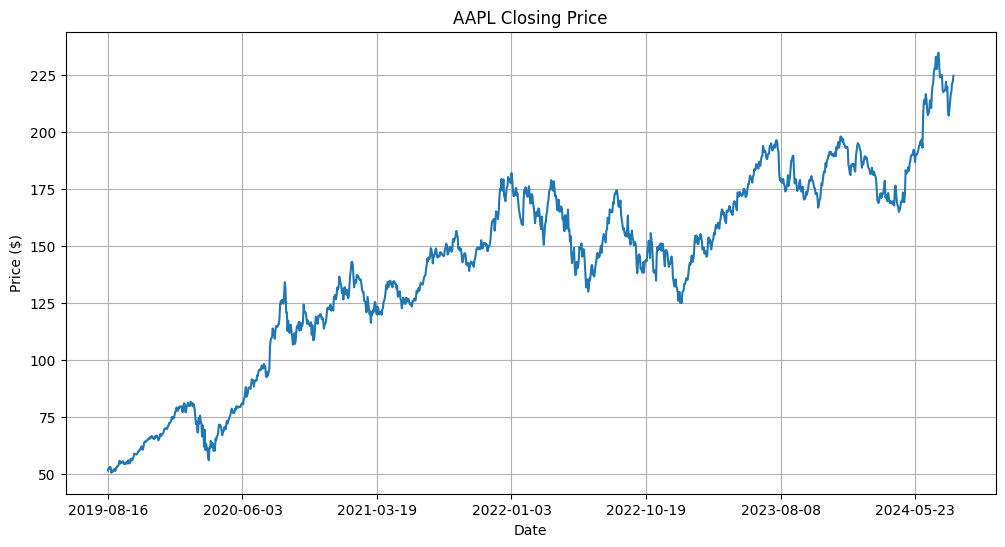

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df["Close"].plot(title="AAPL Closing Price", xlabel="Date", ylabel="Price ($)")
plt.grid()
plt.show()


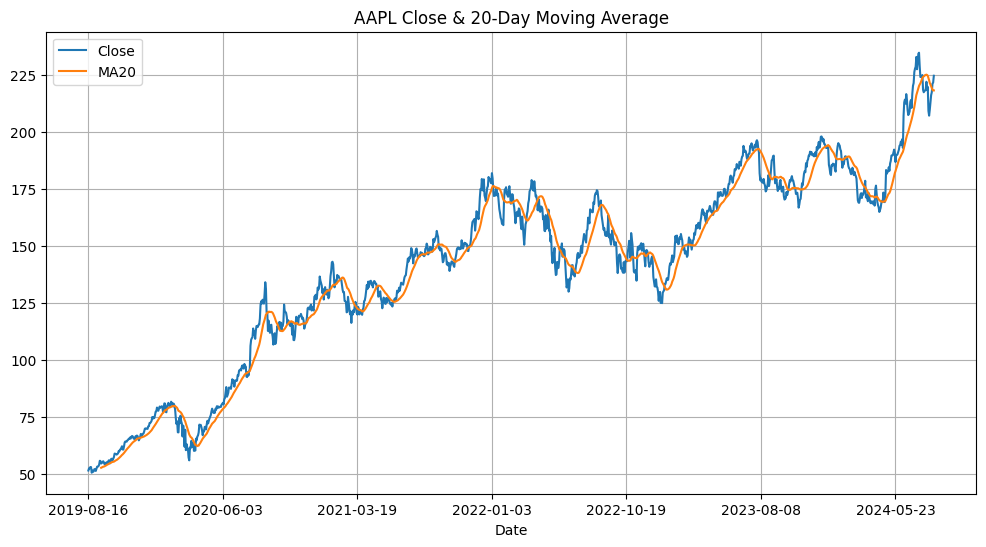

In [6]:
df["MA20"] = df["Close"].rolling(window=20).mean()

df[["Close", "MA20"]].plot(figsize=(12, 6), title="AAPL Close & 20-Day Moving Average")
plt.grid()
plt.show()


In [7]:
df2 = df.reset_index()


In [8]:
df2[1228:]

,Date,Open,High,Low,Close,Adj Close,Volume,MA20
1228,2024-07-05,221.649994,226.449997,221.649994,226.339996,226.078308,60412400,210.983000
1229,2024-07-08,227.089996,227.850006,223.250000,227.820007,227.556610,59085900,212.650001
1230,2024-07-09,227.929993,229.399994,226.369995,228.679993,228.415604,48076100,214.239500
1231,2024-07-10,229.300003,233.080002,229.250000,232.979996,232.710632,62627700,216.232500
1232,2024-07-11,231.389999,232.389999,225.770004,227.570007,227.306900,64710600,217.253501
1233,2024-07-12,228.919998,232.639999,228.679993,230.539993,230.273453,53046500,218.127000
1234,2024-07-15,236.479996,237.229996,233.089996,234.399994,234.128998,62631300,219.135000
1235,2024-07-16,235.000000,236.270004,232.330002,234.820007,234.548523,43234300,220.251500
1236,2024-07-17,229.449997,231.460007,226.639999,228.880005,228.615387,57345900,220.862000
1237,2024-07-18,230.279999,230.440002,222.270004,224.179993,223.920807,66034600,221.356500


In [9]:
df1 = df.reset_index()['Close']

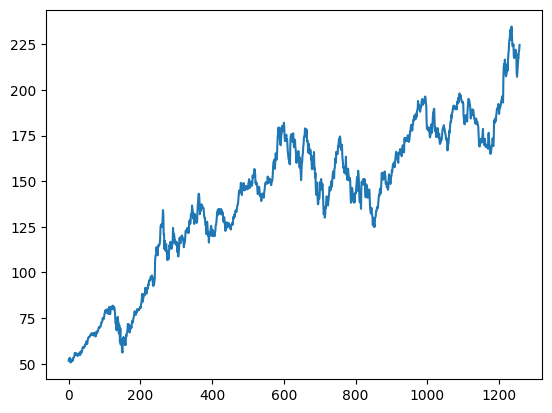

In [10]:
plt.plot(df1)

In [11]:
### LSTM are senstitive to scale of data, so we use MinMax scaler.

In [12]:
import numpy as np

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size, test_size

(817, 441)

In [16]:
import numpy
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [17]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [18]:
print(X_train)

[[0.00524001 0.01046645 0.01048002 ... 0.13189616 0.1299821  0.13649815]
 [0.01046645 0.01048002 0.01357515 ... 0.1299821  0.13649815 0.14524055]
 [0.01048002 0.01357515 0.01333081 ... 0.13649815 0.14524055 0.14619079]
 ...
 [0.4603062  0.4311468  0.43929189 ... 0.51243481 0.47903997 0.47632494]
 [0.4311468  0.43929189 0.46269544 ... 0.47903997 0.47632494 0.47925714]
 [0.43929189 0.46269544 0.45987187 ... 0.47632494 0.47925714 0.48240658]]


In [19]:
print(X_test.shape), print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [20]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 0.1010 - val_loss: 0.0339
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0104 - val_loss: 0.0026
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0056 - val_loss: 0.0177
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0028 - val_loss: 0.0093
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0021 - val_loss: 0.0031
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0015 - val_loss: 0.0030
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0016 - val_loss: 0.0037
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0016 - val_loss: 0.0043
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0015 - val_loss: 0.0036
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/ste

In [25]:
import tensorflow as tf

In [26]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [27]:
train_predict=scaler.inverse_transform(train_predict)

In [28]:
test_predict = scaler.inverse_transform(test_predict)

In [29]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

131.83127186431236

In [30]:
math.sqrt(mean_squared_error(y_test, test_predict))

182.11472871018398

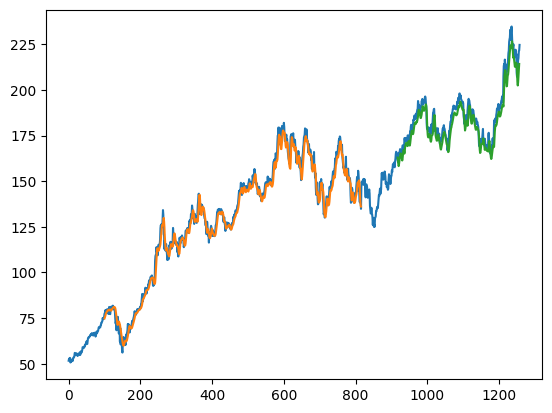

In [31]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [32]:
len(test_data)

441

In [33]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [34]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [35]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):

        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.9086645]
101
1 day input [0.64644875 0.66599692 0.6560599  0.64818633 0.64172454 0.64612288
 0.641616   0.64574282 0.63960682 0.6462315  0.63596869 0.6753909
 0.68359035 0.66263031 0.64465682 0.63716331 0.63195042 0.62087313
 0.62543436 0.63119021 0.642702   0.64742612 0.64422241 0.66702865
 0.64981536 0.64422241 0.66447651 0.72067767 0.71160948 0.71535615
 0.71720243 0.72713945 0.71888574 0.73642481 0.74266935 0.75510423
 0.75575581 0.75591871 0.76227187 0.76938532 0.76151167 0.73968288
 0.75651602 0.75657037 0.75819933 0.76362939 0.76884228 0.77850778
 0.78024544 0.78849907 0.7809513  0.79403776 0.77356641 0.84975015
 0.88189618 0.88824934 0.87874674 0.90144435 0.88852078 0.8634882
 0.85159643 0.85512594 0.86017594 0.88287355 0.88748914 0.86859247
 0.90187877 0.9209926  0.92794307 0.95395303 0.96198958 0.96665935
 0.99000863 0.96063206 0.97675926 0.9977193  1.         0.96774543
 0.94222408 0.94293001 0.94102954 0.94673104 0.91159854 0.90589704
 0.90844918 0.90996958 0.91301041 0.

In [36]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [37]:
import matplotlib.pyplot as plt

In [38]:
len(df1)

1258

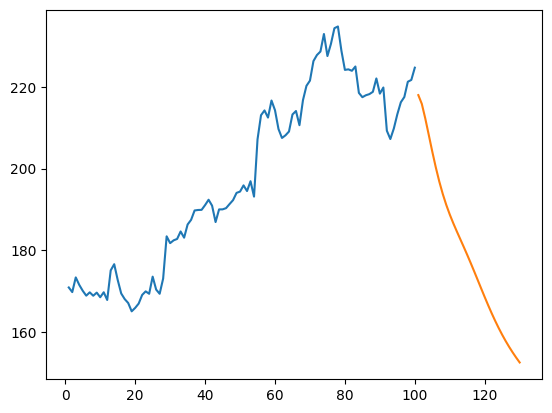

In [39]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

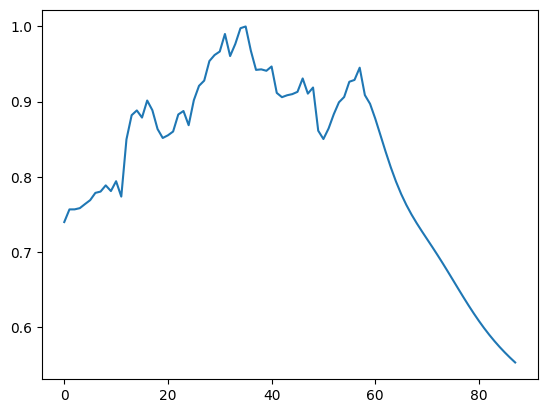

In [41]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [42]:
df3=scaler.inverse_transform(df3).tolist()

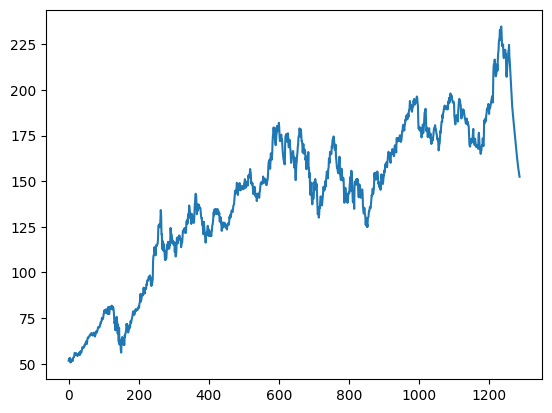

In [43]:
plt.plot(df3)

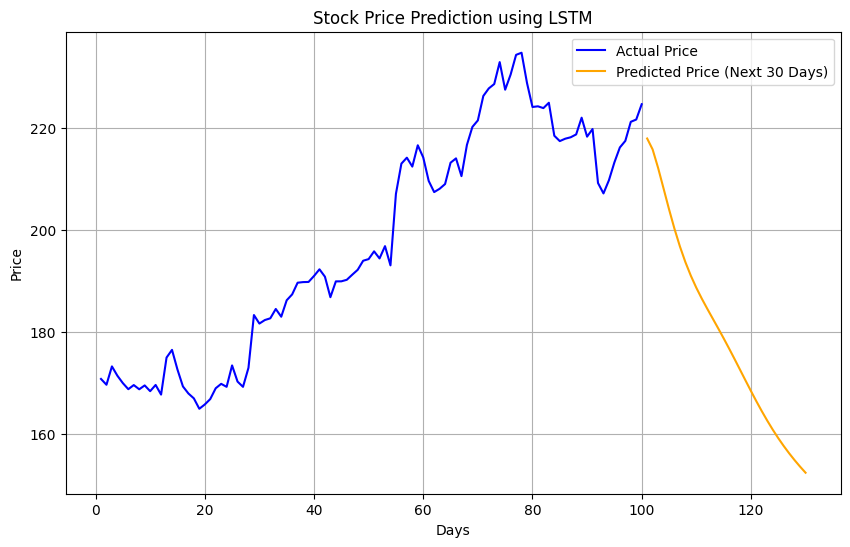

In [44]:
plt.figure(figsize=(10,6))
plt.plot(day_new, scaler.inverse_transform(df1[1158:]), label="Actual Price", color='blue')
plt.plot(day_pred, scaler.inverse_transform(lst_output), label="Predicted Price (Next 30 Days)", color='orange')
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Stock Price Prediction using LSTM")
plt.legend()
plt.grid(True)
plt.show()


In [45]:
model.save("lstm_stock_model.h5")
